In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Getting the data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None,
                   names=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Species"])

In [3]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Since our implemented perceptron works best on binary classification.
<br>In this dataset, we'll remove one class - 'Iris-virginica'.
<br>And also, we'll keep only two features, 'Sepal Length' and 'Petal Length' for the sake of visualization.


In [5]:
df = df[df["Species"] != 'Iris-virginica']

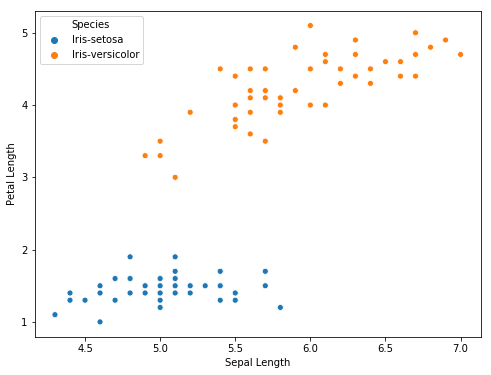

In [6]:
# Sepal Length vs Petal Length Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Sepal Length", y="Petal Length", data=df, hue="Species")

In [7]:
# Preparing the data

X = df[["Sepal Length", "Petal Length"]].values

y = df["Species"].values
y = np.where(y == 'Iris-setosa', -1, 1)

## Perceptron

In [8]:
# Fitting the perceptron

from perceptron import Perceptron
ppn = Perceptron(n_iters=10)

ppn.fit(X, y)

Text(0, 0.5, 'Number of Misclassifications')

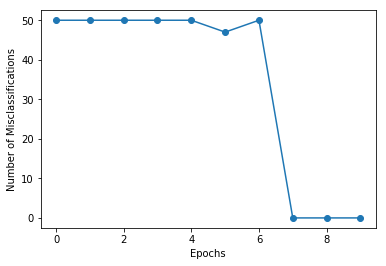

In [9]:
# plot of error rate with every iteration
plt.plot(ppn.error_list, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Number of Misclassifications")

In [10]:
# plotting the decision boundary

from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('v', 'x', 'o', '^', 's')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


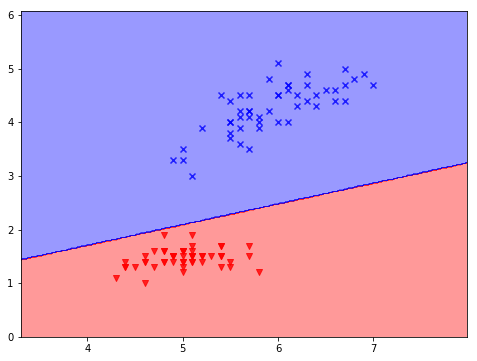

In [11]:
plt.figure(figsize=(8, 6))
plot_decision_regions(X, y, classifier=ppn)

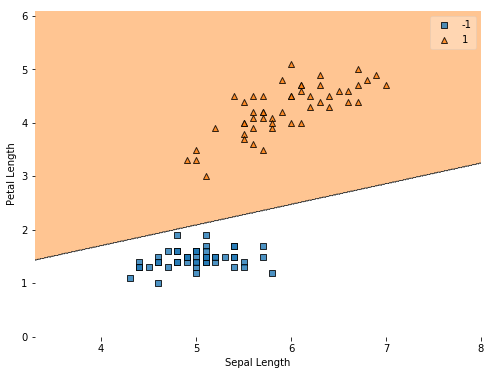

In [12]:
# using mlxtend library
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8, 6))
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plot_decision_regions(X, y, clf=ppn)

## Adaline

In [13]:
from Adaptive_Linear_Neuron import Adaline

In [14]:
adl = Adaline(n_iters=10, log_transform=True)

In [15]:
adl.fit(X, y)

Text(0.5, 1.0, 'Adaline - Learning rate=0.01')

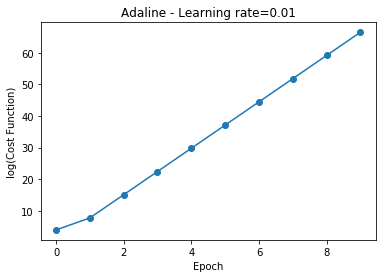

In [16]:
plt.plot(adl.cost_list, marker='o')
plt.xlabel("Epoch")
plt.ylabel("log(Cost Function)")
plt.title('Adaline - Learning rate=0.01')

In [17]:
adl2 = Adaline(eta=0.0001, n_iters=20, log_transform=False)

In [18]:
adl2.fit(X, y)

Text(0.5, 1.0, 'Adaline - Learning rate=0.0001')

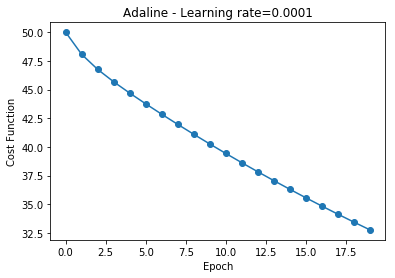

In [19]:
plt.plot(adl2.cost_list, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Cost Function")
plt.title('Adaline - Learning rate=0.0001')

### Running Adaline After Standardizing the data

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
stdsc = StandardScaler()
X_std = stdsc.fit_transform(X)

Text(0.5, 1.0, 'Adaline - Learning rate=0.01 (With Standardized Data)')

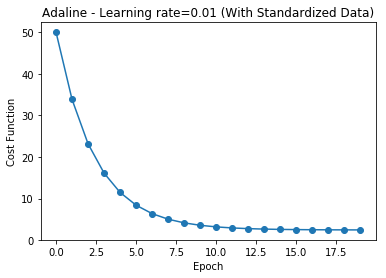

In [22]:
adl3 = Adaline(eta=0.01, n_iters=20, log_transform=False)
adl3.fit(X_std, y)

plt.plot(adl3.cost_list, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Cost Function")
plt.title('Adaline - Learning rate=0.01 (With Standardized Data)')

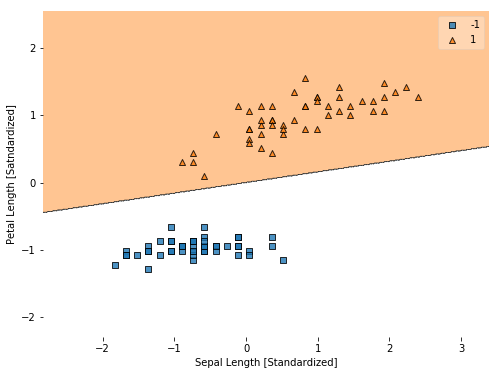

In [23]:
plt.figure(figsize=(8, 6))
plt.xlabel("Sepal Length [Standardized]")
plt.ylabel("Petal Length [Satndardized]")
plot_decision_regions(X_std, y, clf=adl3)

### Adaline with Stochastic Gradient Descent

In [24]:
from AdalineSGD import AdalineSGD

adlsgd = AdalineSGD(n_iters=20)

adlsgd.fit(X_std, y)

Text(0, 0.5, 'Cost Function')

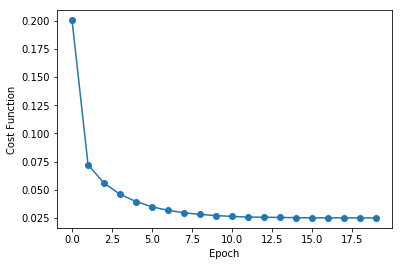

In [25]:
plt.plot(adlsgd.cost_list, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Cost Function")

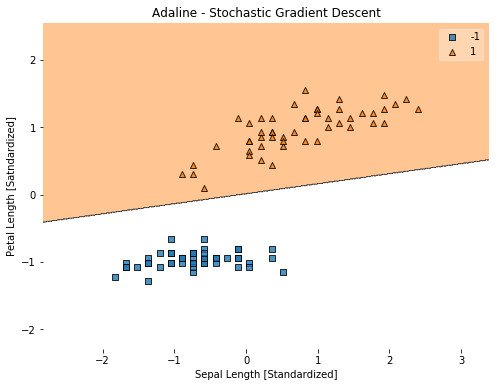

In [26]:
plt.figure(figsize=(8, 6))
plt.xlabel("Sepal Length [Standardized]")
plt.ylabel("Petal Length [Satndardized]")
plt.title("Adaline - Stochastic Gradient Descent")
plot_decision_regions(X_std, y, clf=adlsgd)